## <span style="color:purple">**Configurações iniciais**</span>

In [1]:
source("R/settings.R")

Loading required package: pacman



In [2]:
# Informações de acessos
ask_secrets_catho()

Please inform Catho Database Credentials ········


In [18]:
S3_PATH <- "s3://ai-analytics-sotq-framework/catho/new_data/"
OVERWRITE <- FALSE
PARALLEL <- TRUE
PARALLEL_WORKERS <- 10

start_date <- "2024-01-01"
end_date   <- "2024-03-31"
 
all_target_dates <- seq(as_date(start_date), as_date(end_date), by = "day")

contact_emps_blacklist <- c(1383457,1382097)

all_channels_cbu <- c("Busca de Vagas","Sugestão de Vagas","Sugestão Delivery", "Aviso de Vagas","Vagas Similares", "Auto-Apply")
all_channels_hbu <- c("Recrutamento Perfeito","Vagas Gratis","Triagem")
all_channels <- c(all_channels_cbu,all_channels_hbu)

## <span style="color:purple">**Download**</span>

In [16]:
# Download dos dados
download_raw(
    types = c("applies","contacts"),
    target_dates = all_target_dates,
    overwrite=OVERWRITE,
    parallel=PARALLEL
)

Downloading: applies

Downloading: contacts



In [17]:
# Enriquecimento dos dados
enrich_raw(
    types = c("applies","contacts"),
    target_dates = all_target_dates,
    overwrite=OVERWRITE,
    parallel=PARALLEL
)

Enriching: applies

Enriching: contacts



In [ ]:
# Merges
PARALLEL_WORKERS <- 10
merge_data(
   daily_fun = generate_applies_with_searches_daily,
   s3_path = paste0(S3_PATH,"merged/contacts-applies/"),
   conn = get_secret("MYSQL_CATHO_HOST_WAREHOUSE"),
   target_dates = all_target_dates,
   overwrite=T,parallel=PARALLEL
)

Merging: applies with searches



## <span style="color:purple">**Applies Verification**</span>

In [19]:
cbu_applies <- summarise_data(
  target_dates = all_target_dates,
  type = "applies",
  type_level = "enriched",stat_id = "usr_id",
  groups = c("report_channel","apply_device_channel","subscription","apply_quali","year","month","day"))


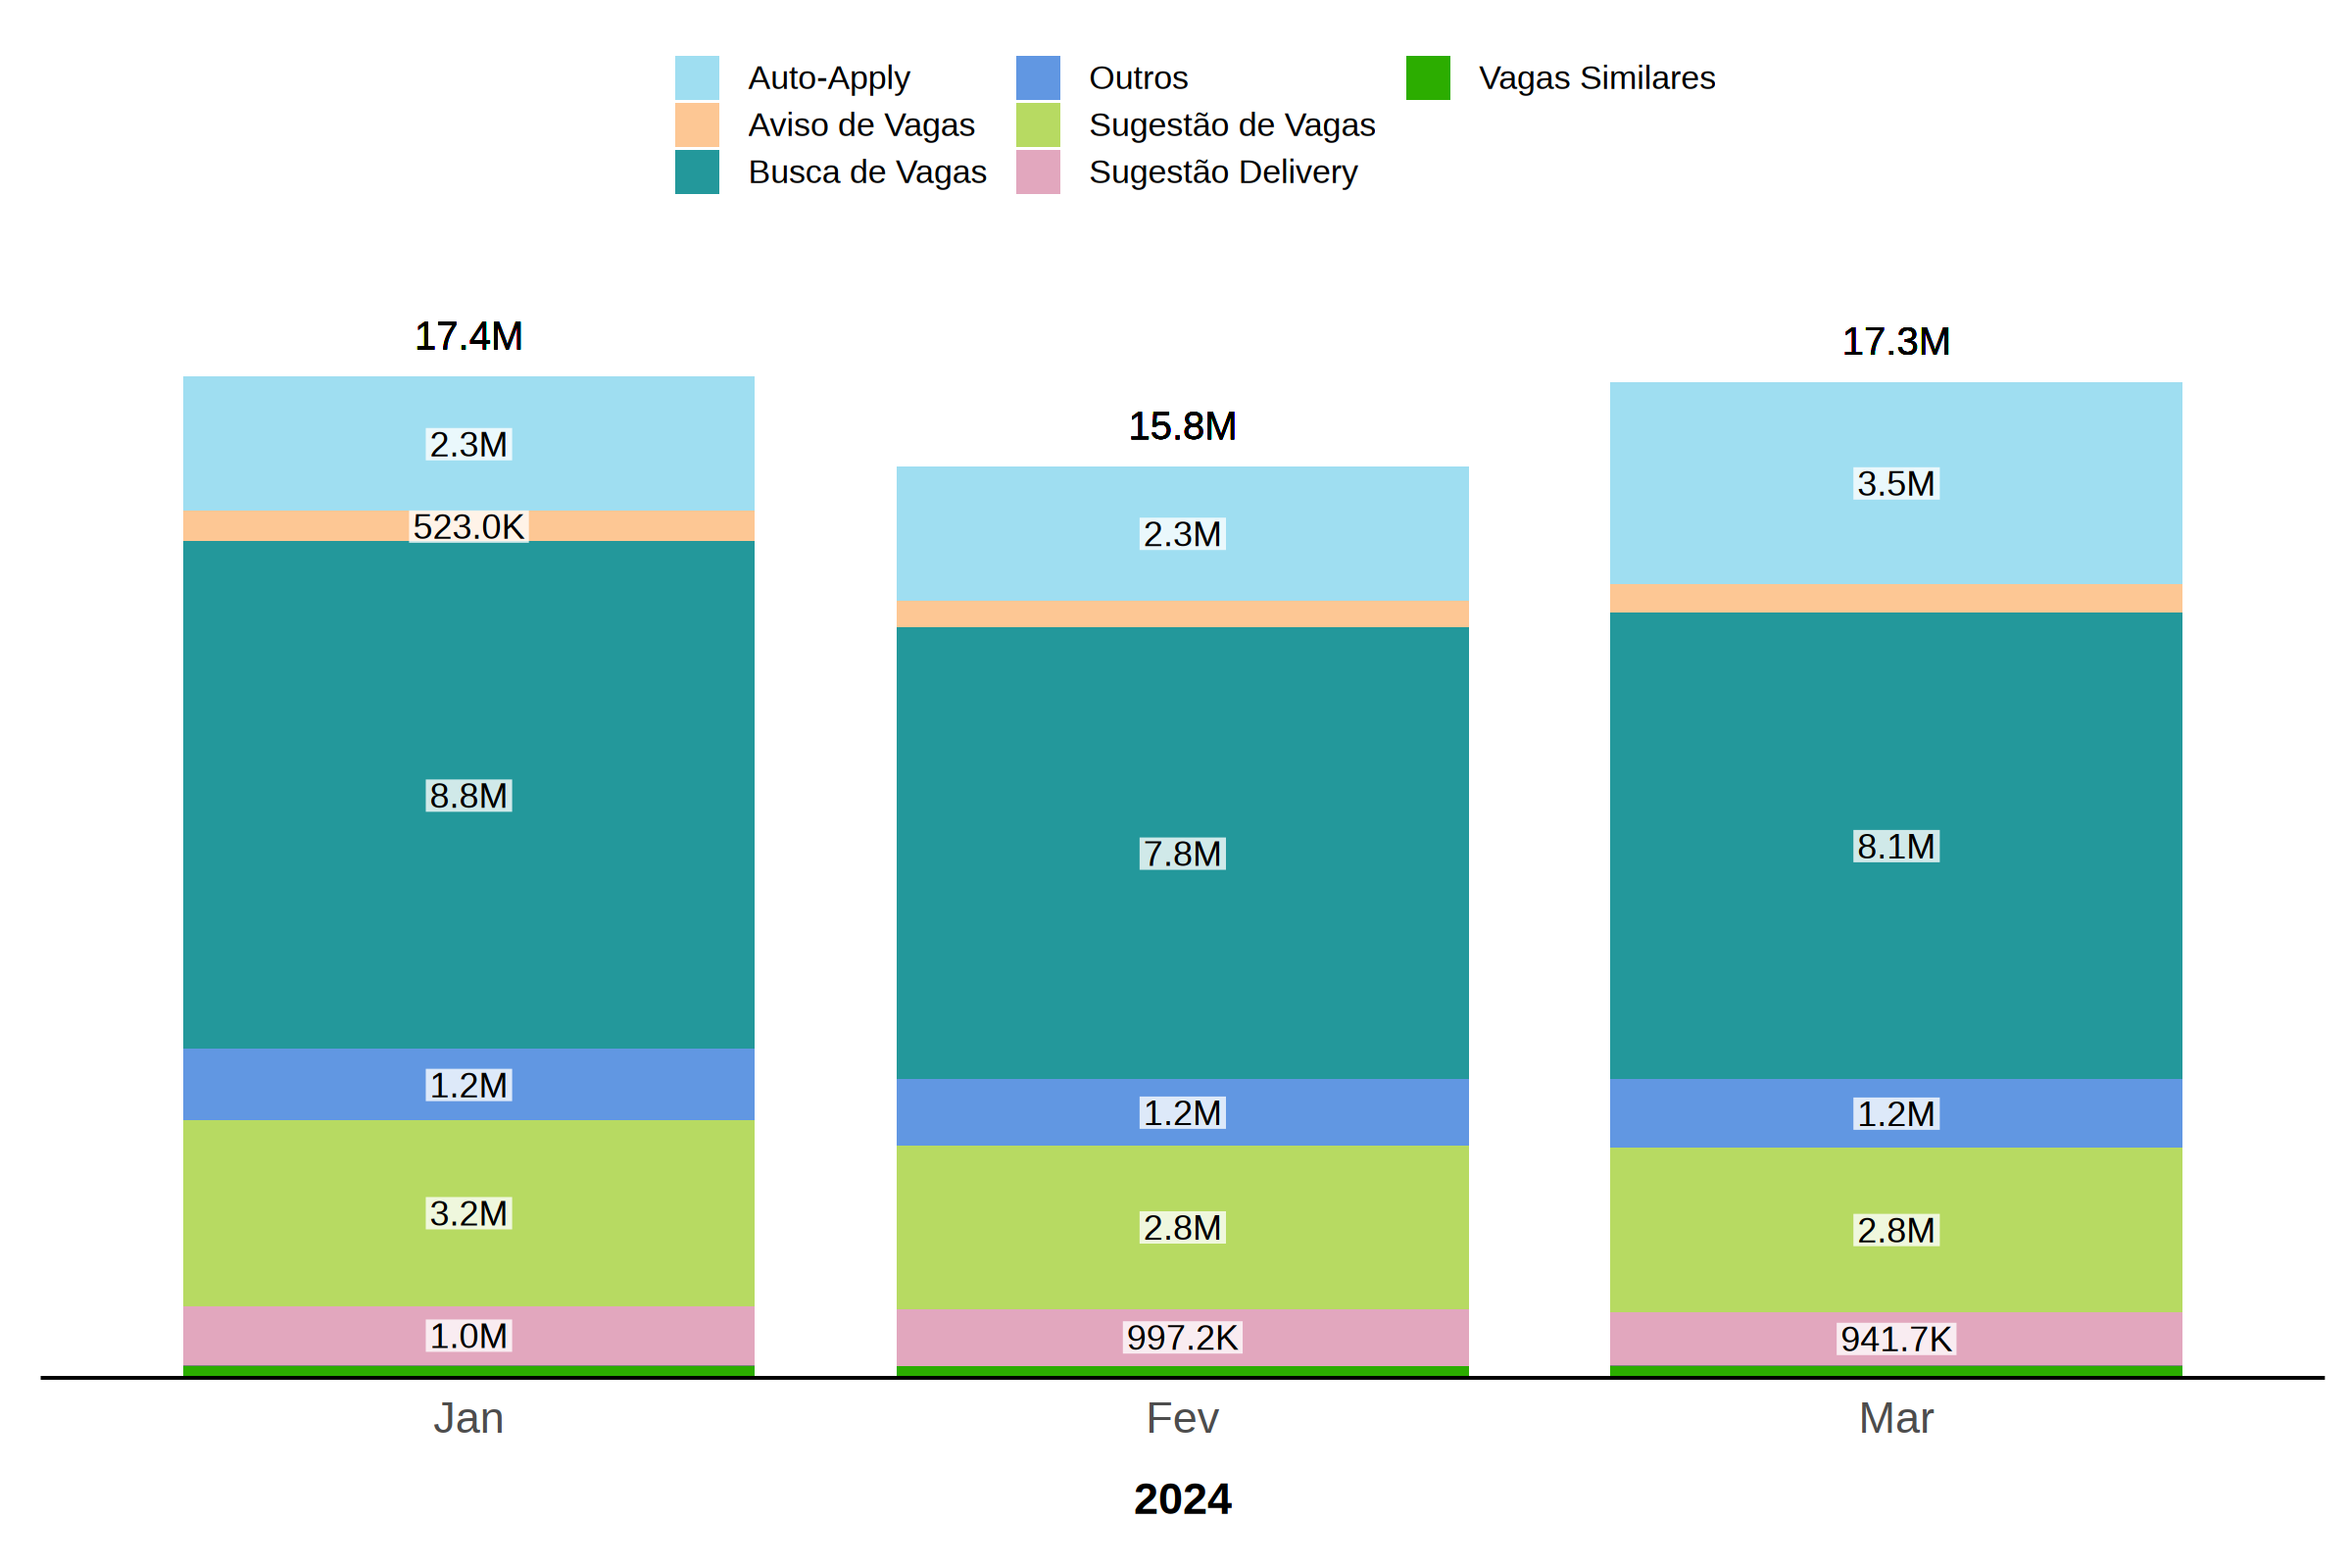

In [20]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_applies |> 
    generate_stats(stats_var = "applies",category_var = "report_channel",groups = c("year", "month")) |> 
    plot_monthly_volume()
    

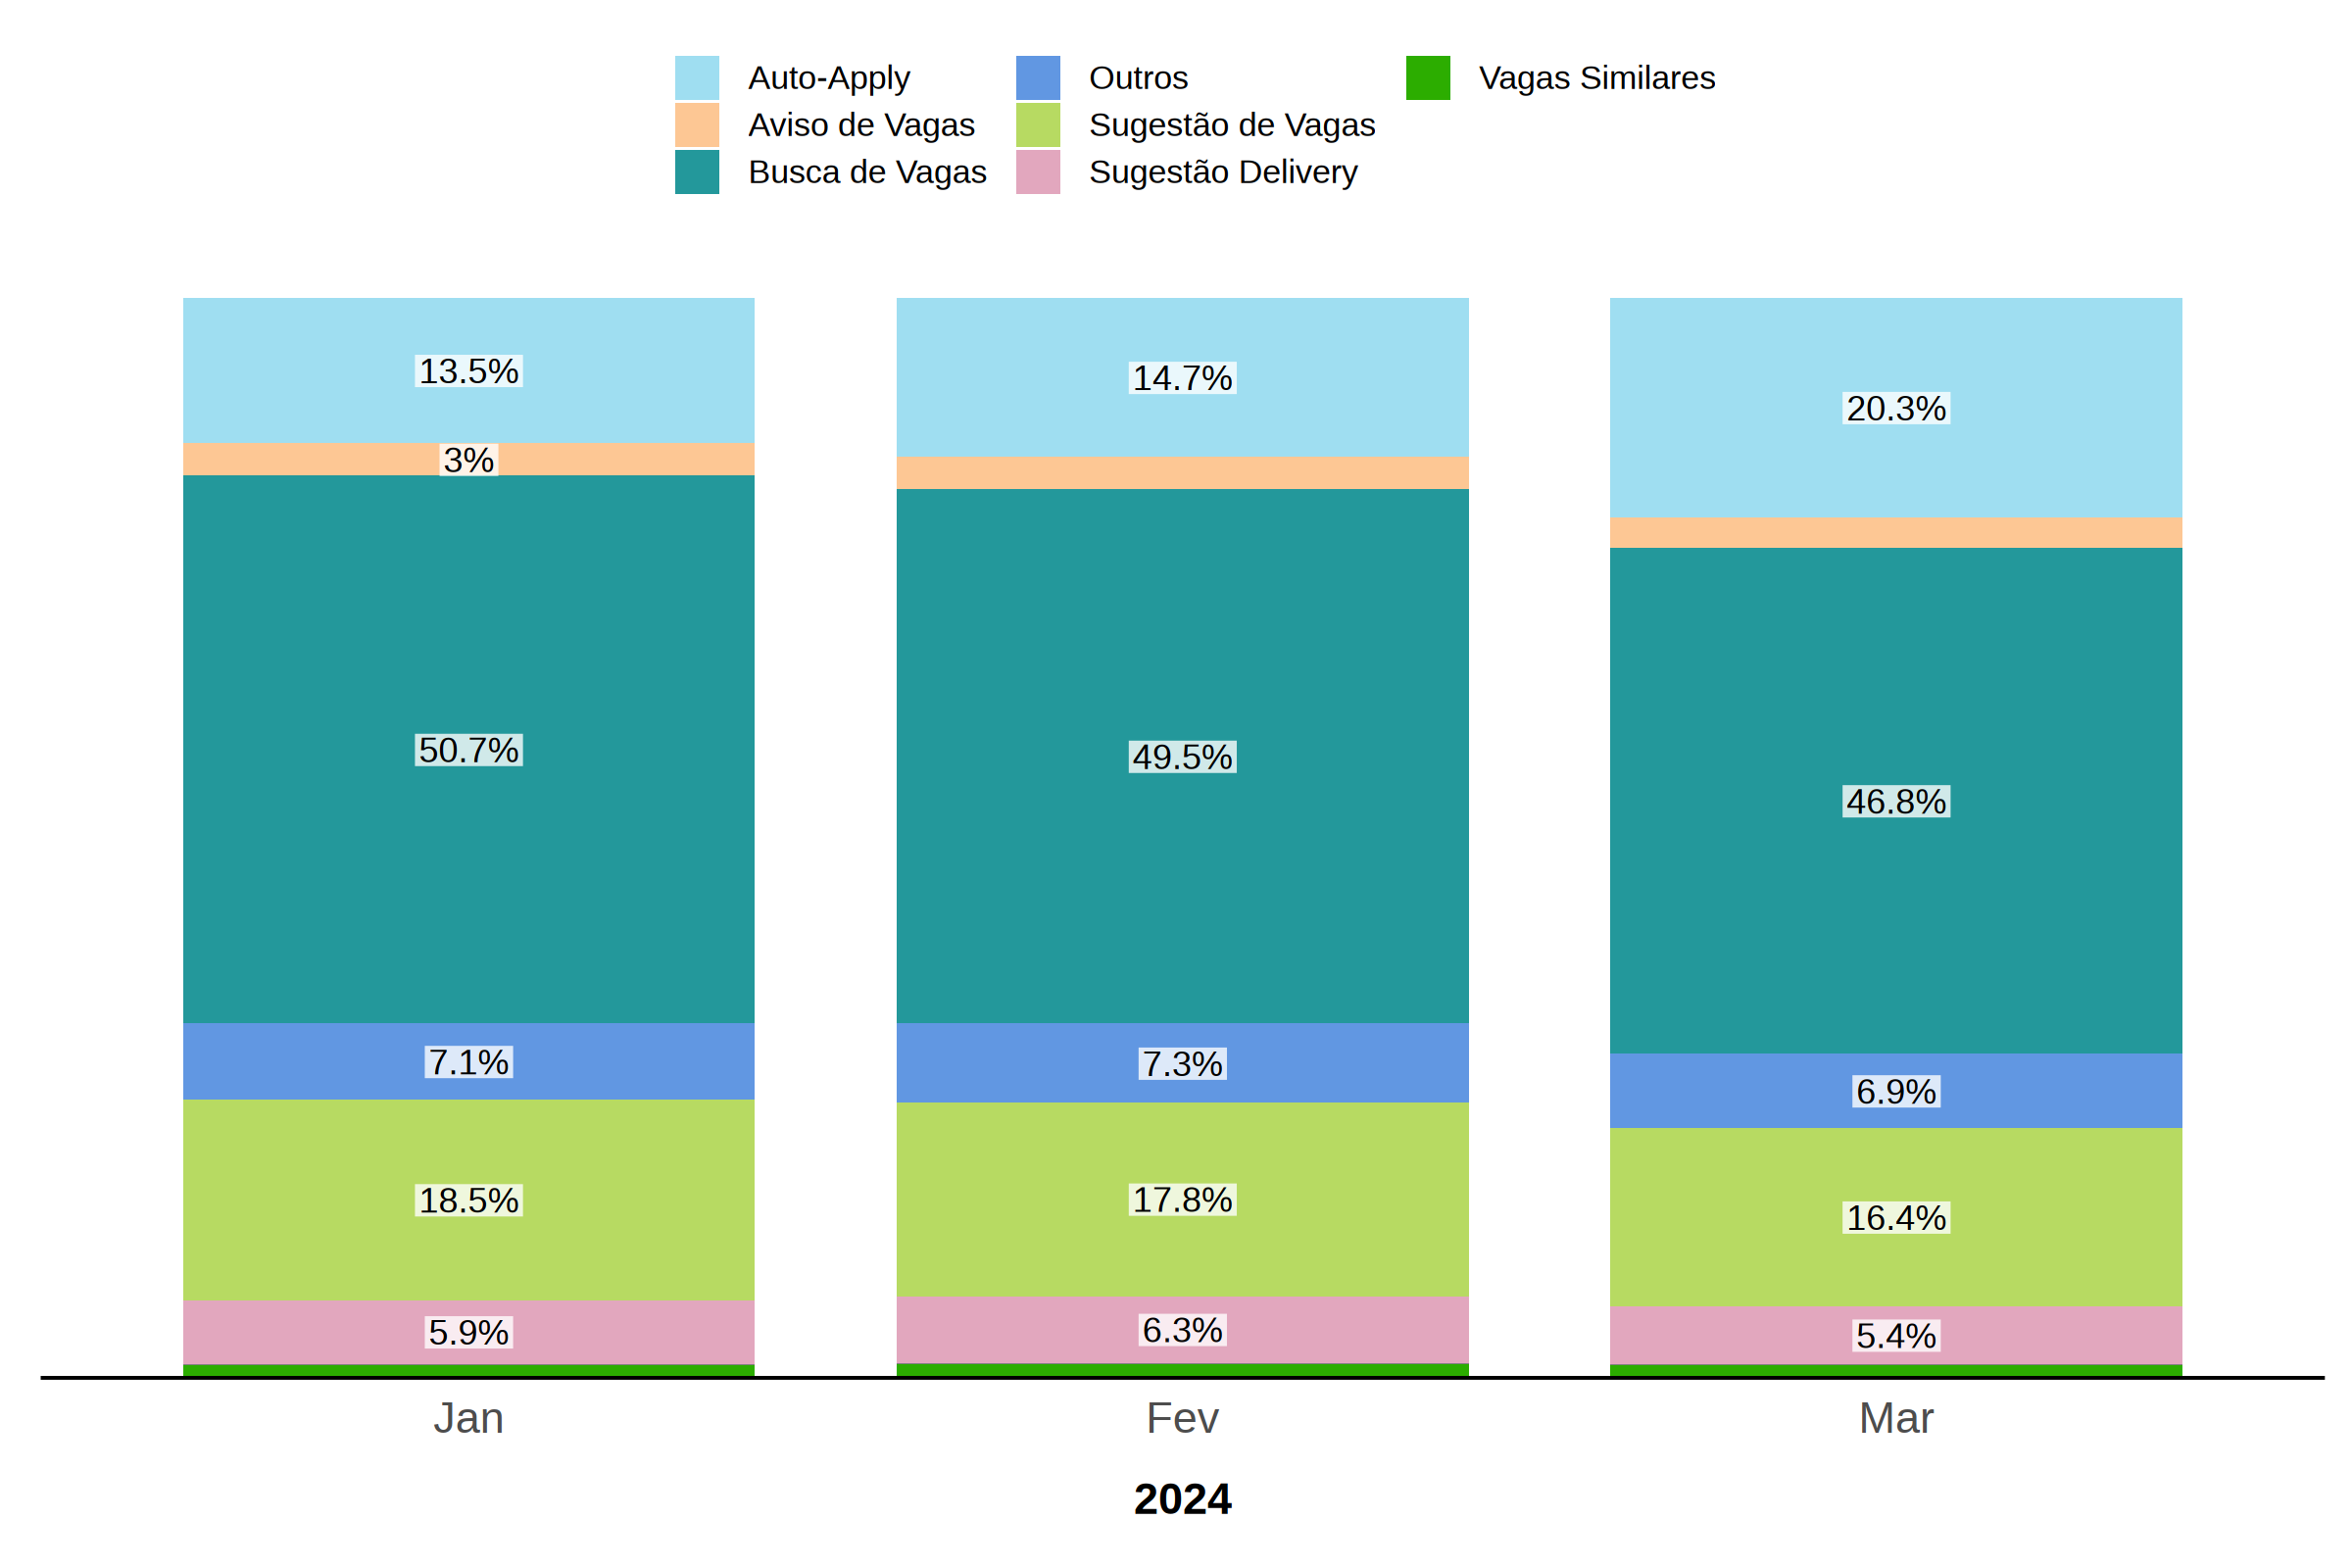

In [21]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_applies |> 
    generate_stats(stats_var = "applies",category_var = "report_channel",groups = c("year", "month")) |> 
    plot_monthly_share()
    

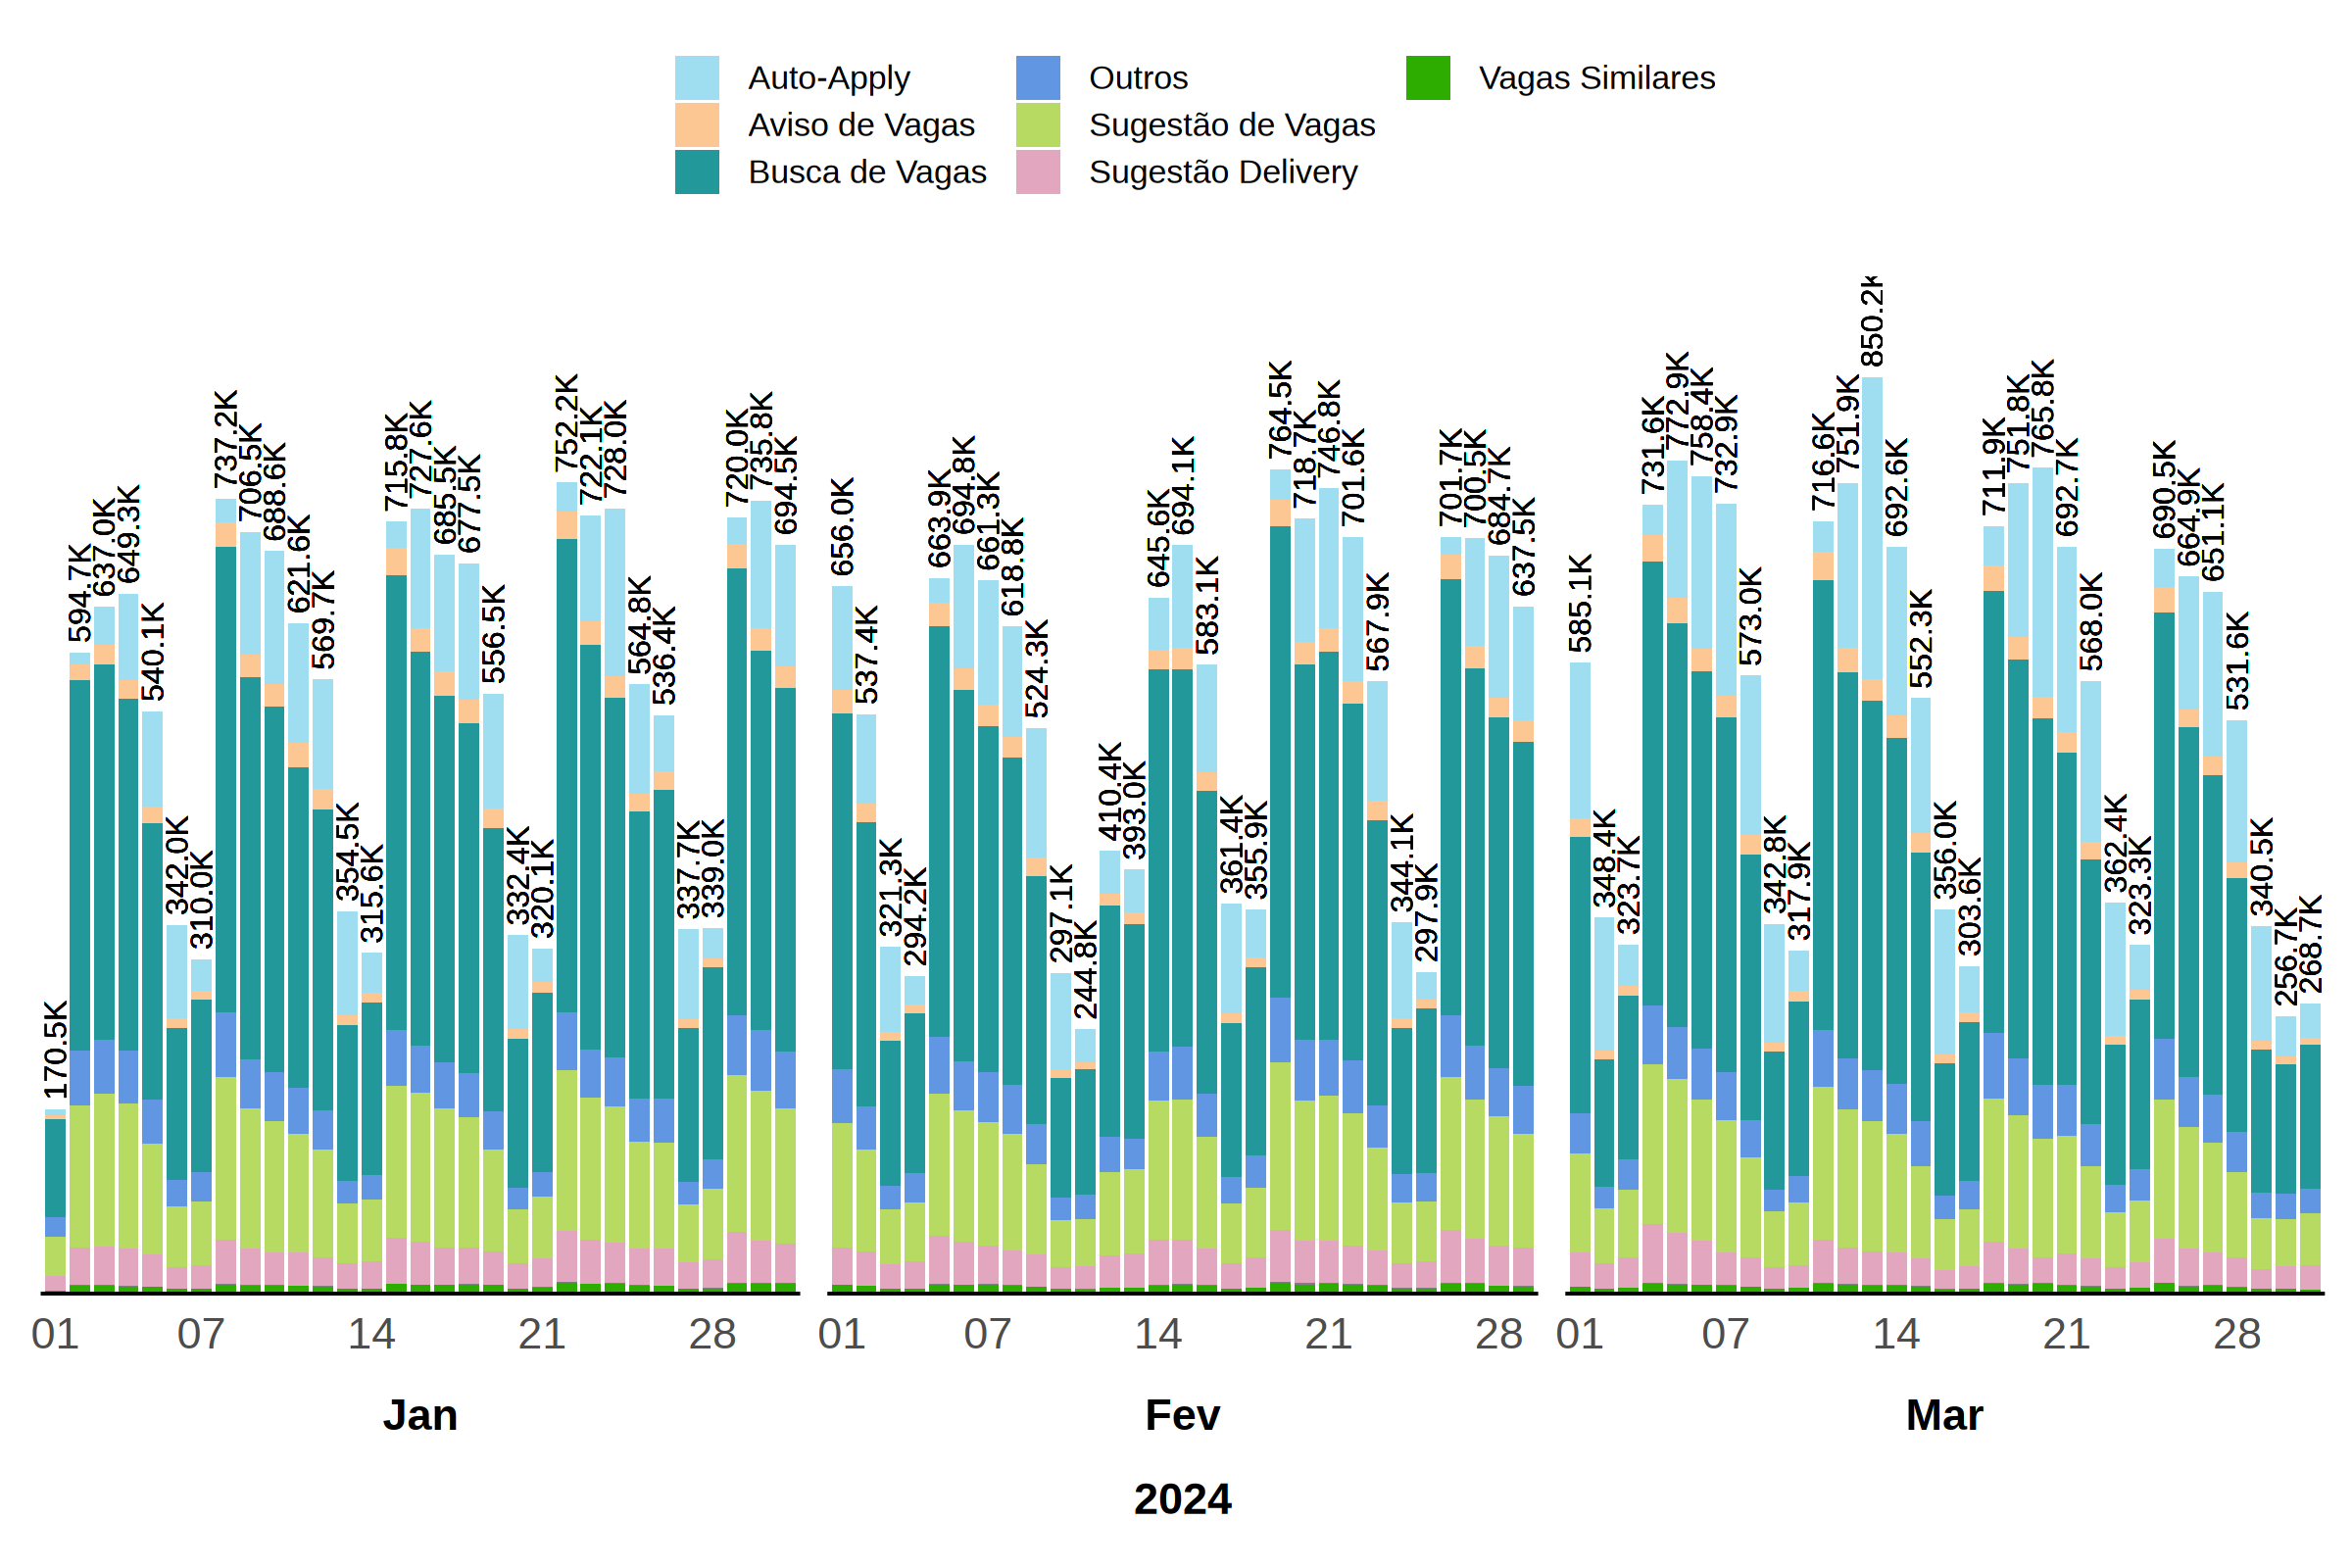

In [22]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_applies |> 
    generate_stats(stats_var = "applies",category_var = "report_channel",groups = c("year", "month","day")) |> 
    plot_daily_volume()
    

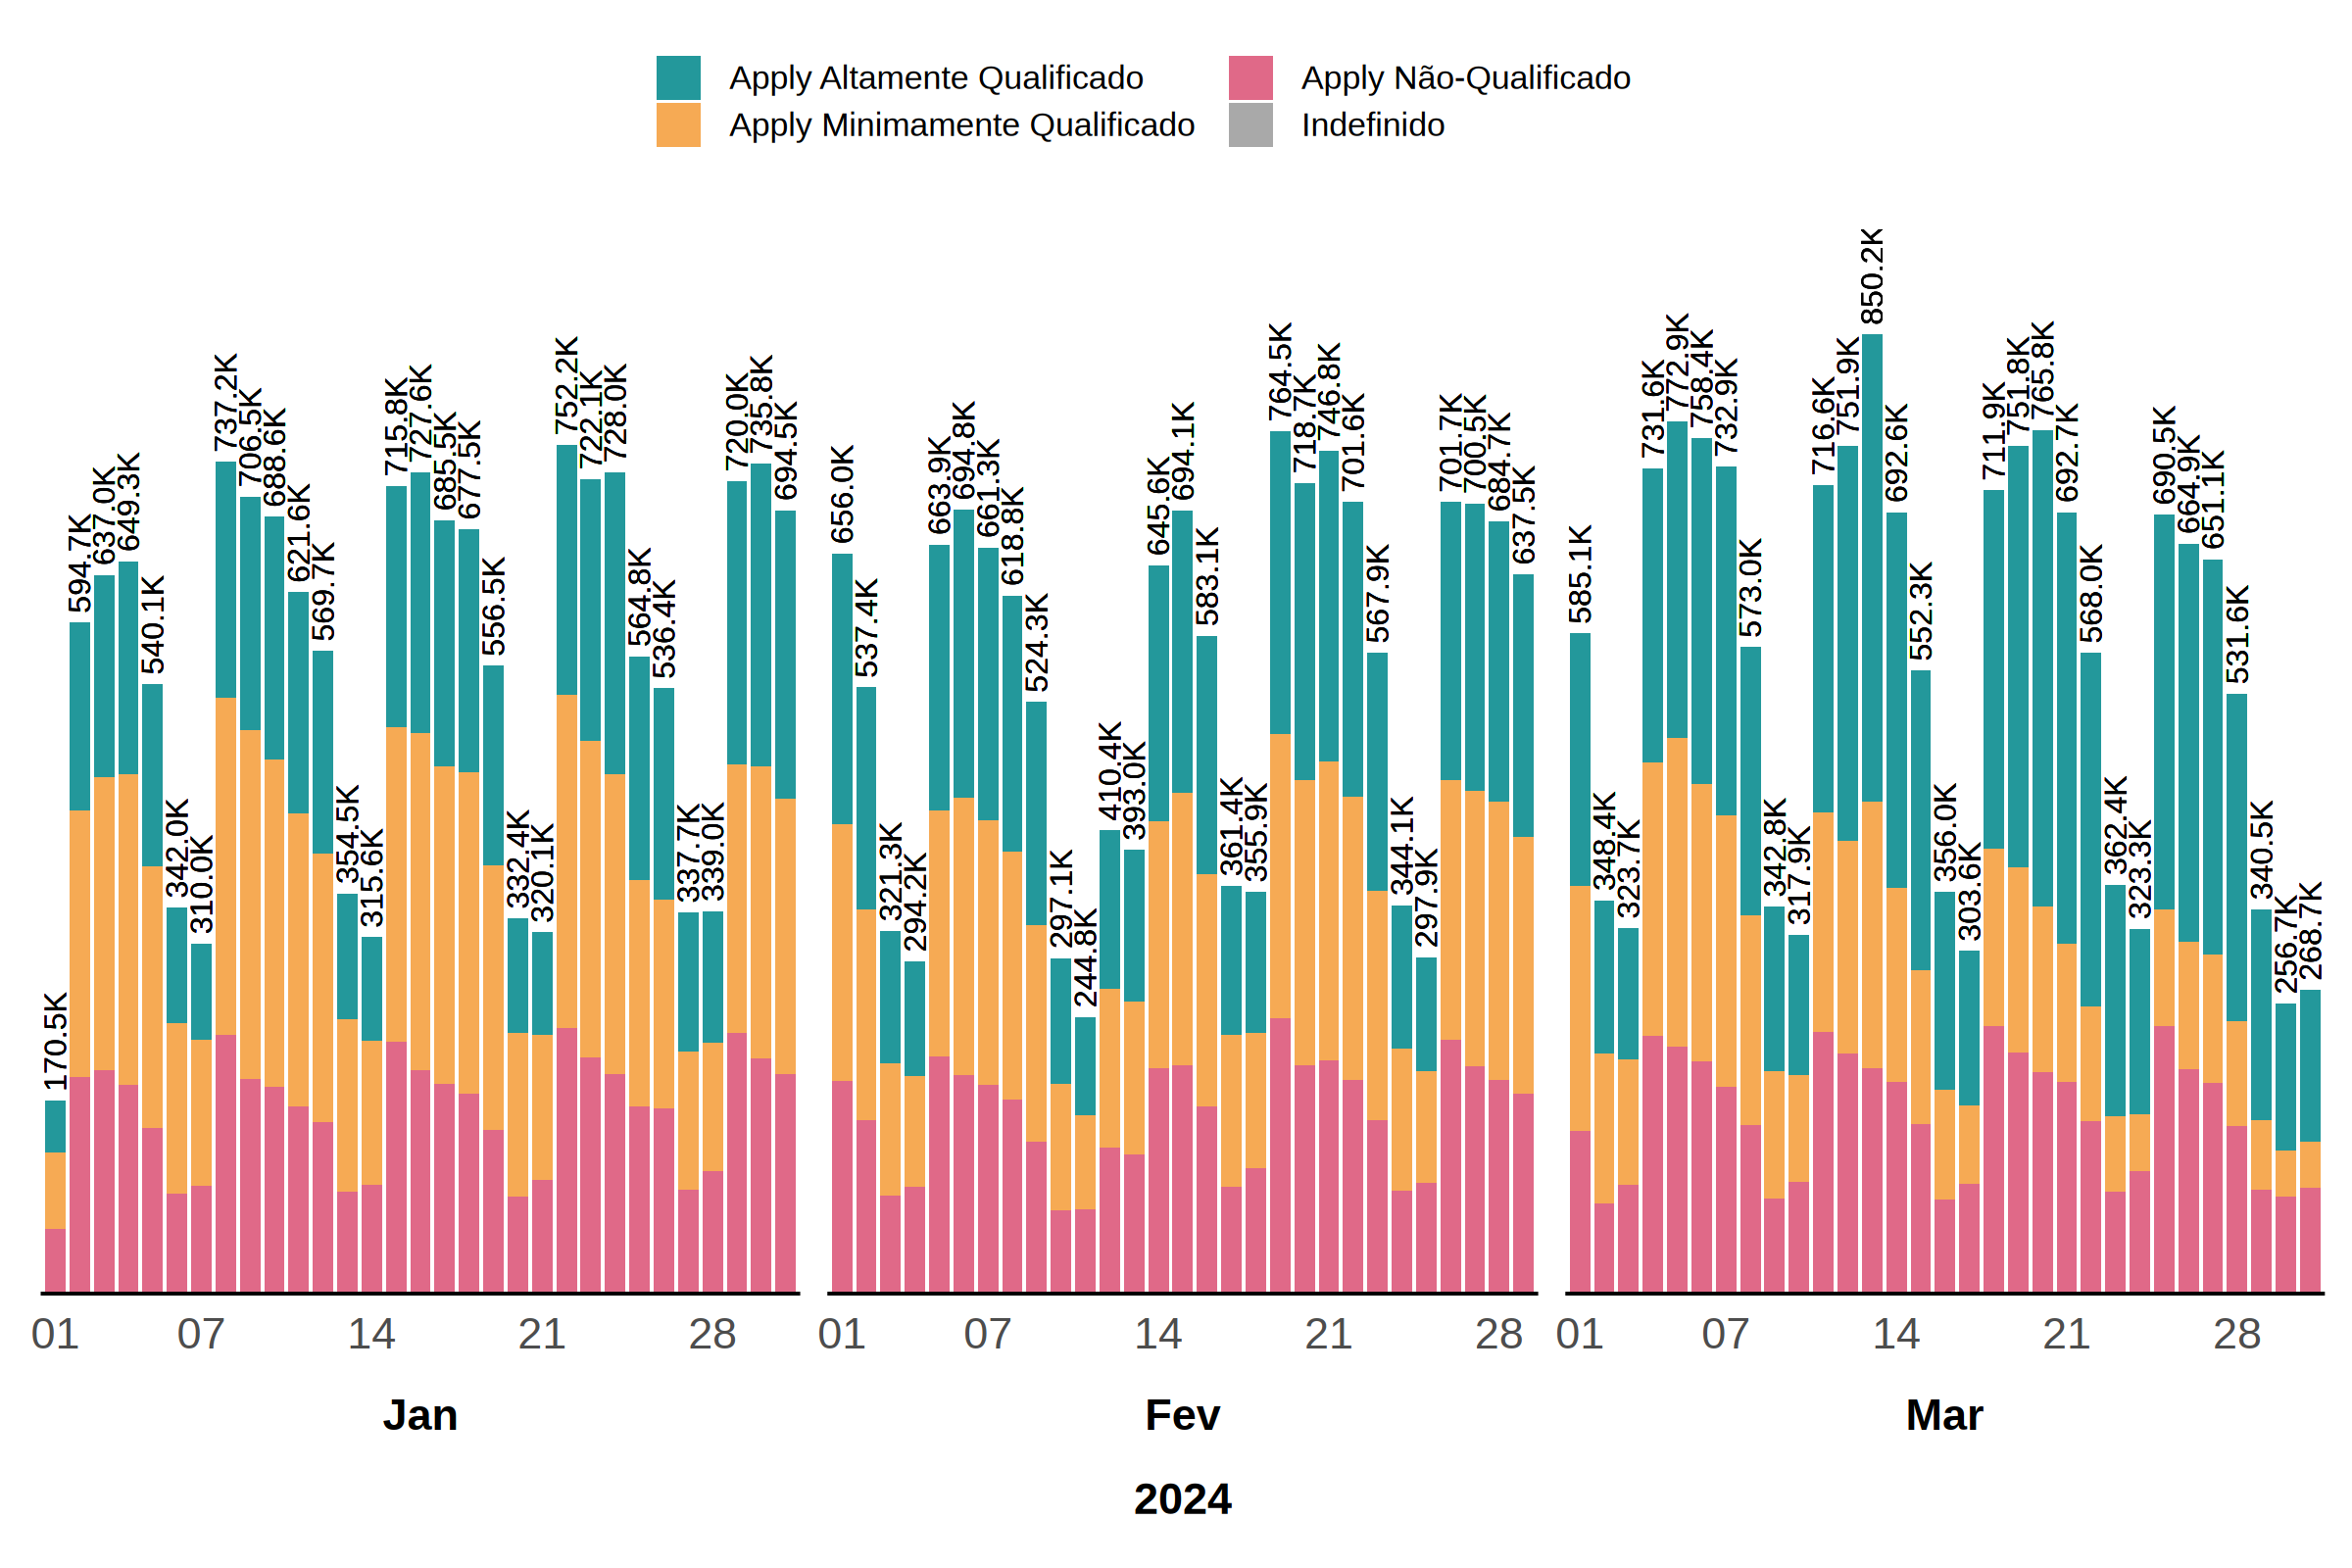

In [23]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_applies |> 
    generate_stats(stats_var = "applies",category_var = "apply_quali",groups = c("year", "month","day")) |> 
    plot_daily_volume()
    

## <span style="color:purple">**Contacts Verification**</span>

In [25]:
hbu_contatos <- summarise_data(
  target_dates = all_target_dates,
  type = "contacts",
  type_level = "enriched",stat_id = "usr_id",
  groups = c("origem","subscription","year","month","day"))


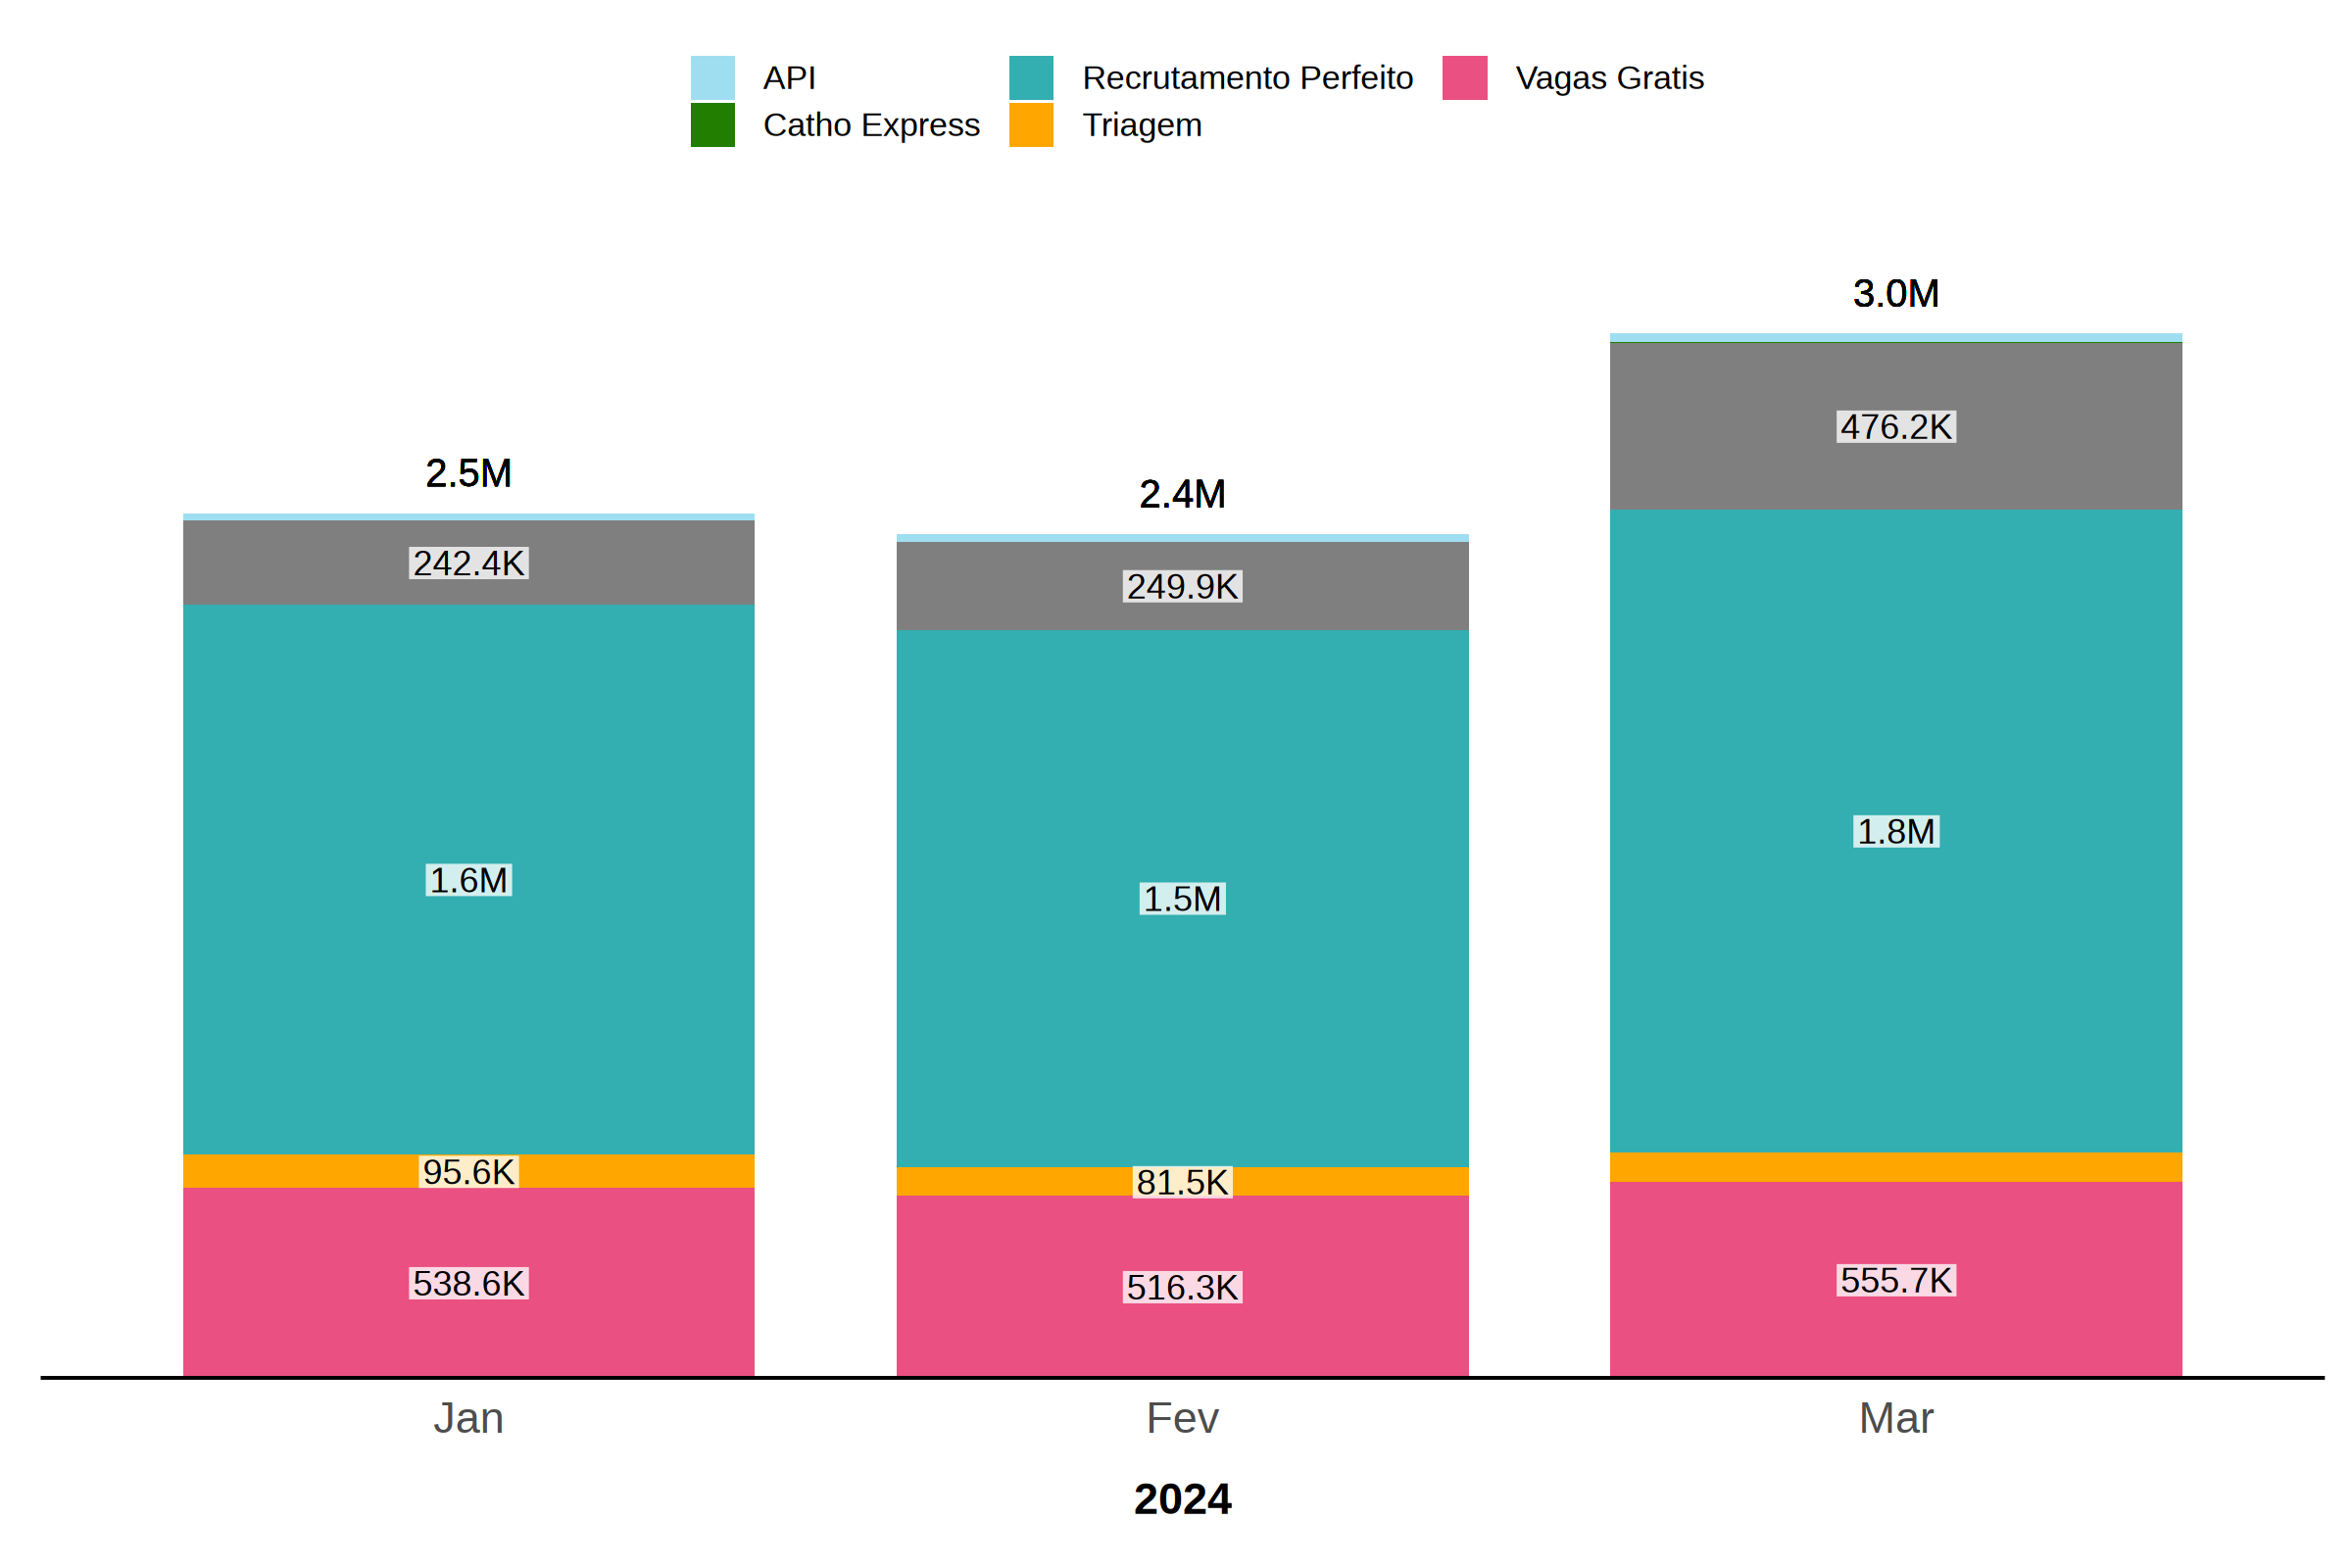

In [27]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
hbu_contatos |>
    generate_stats(stats_var = "contacts",category_var = "origem",groups = c("year", "month")) |>
    plot_monthly_volume()

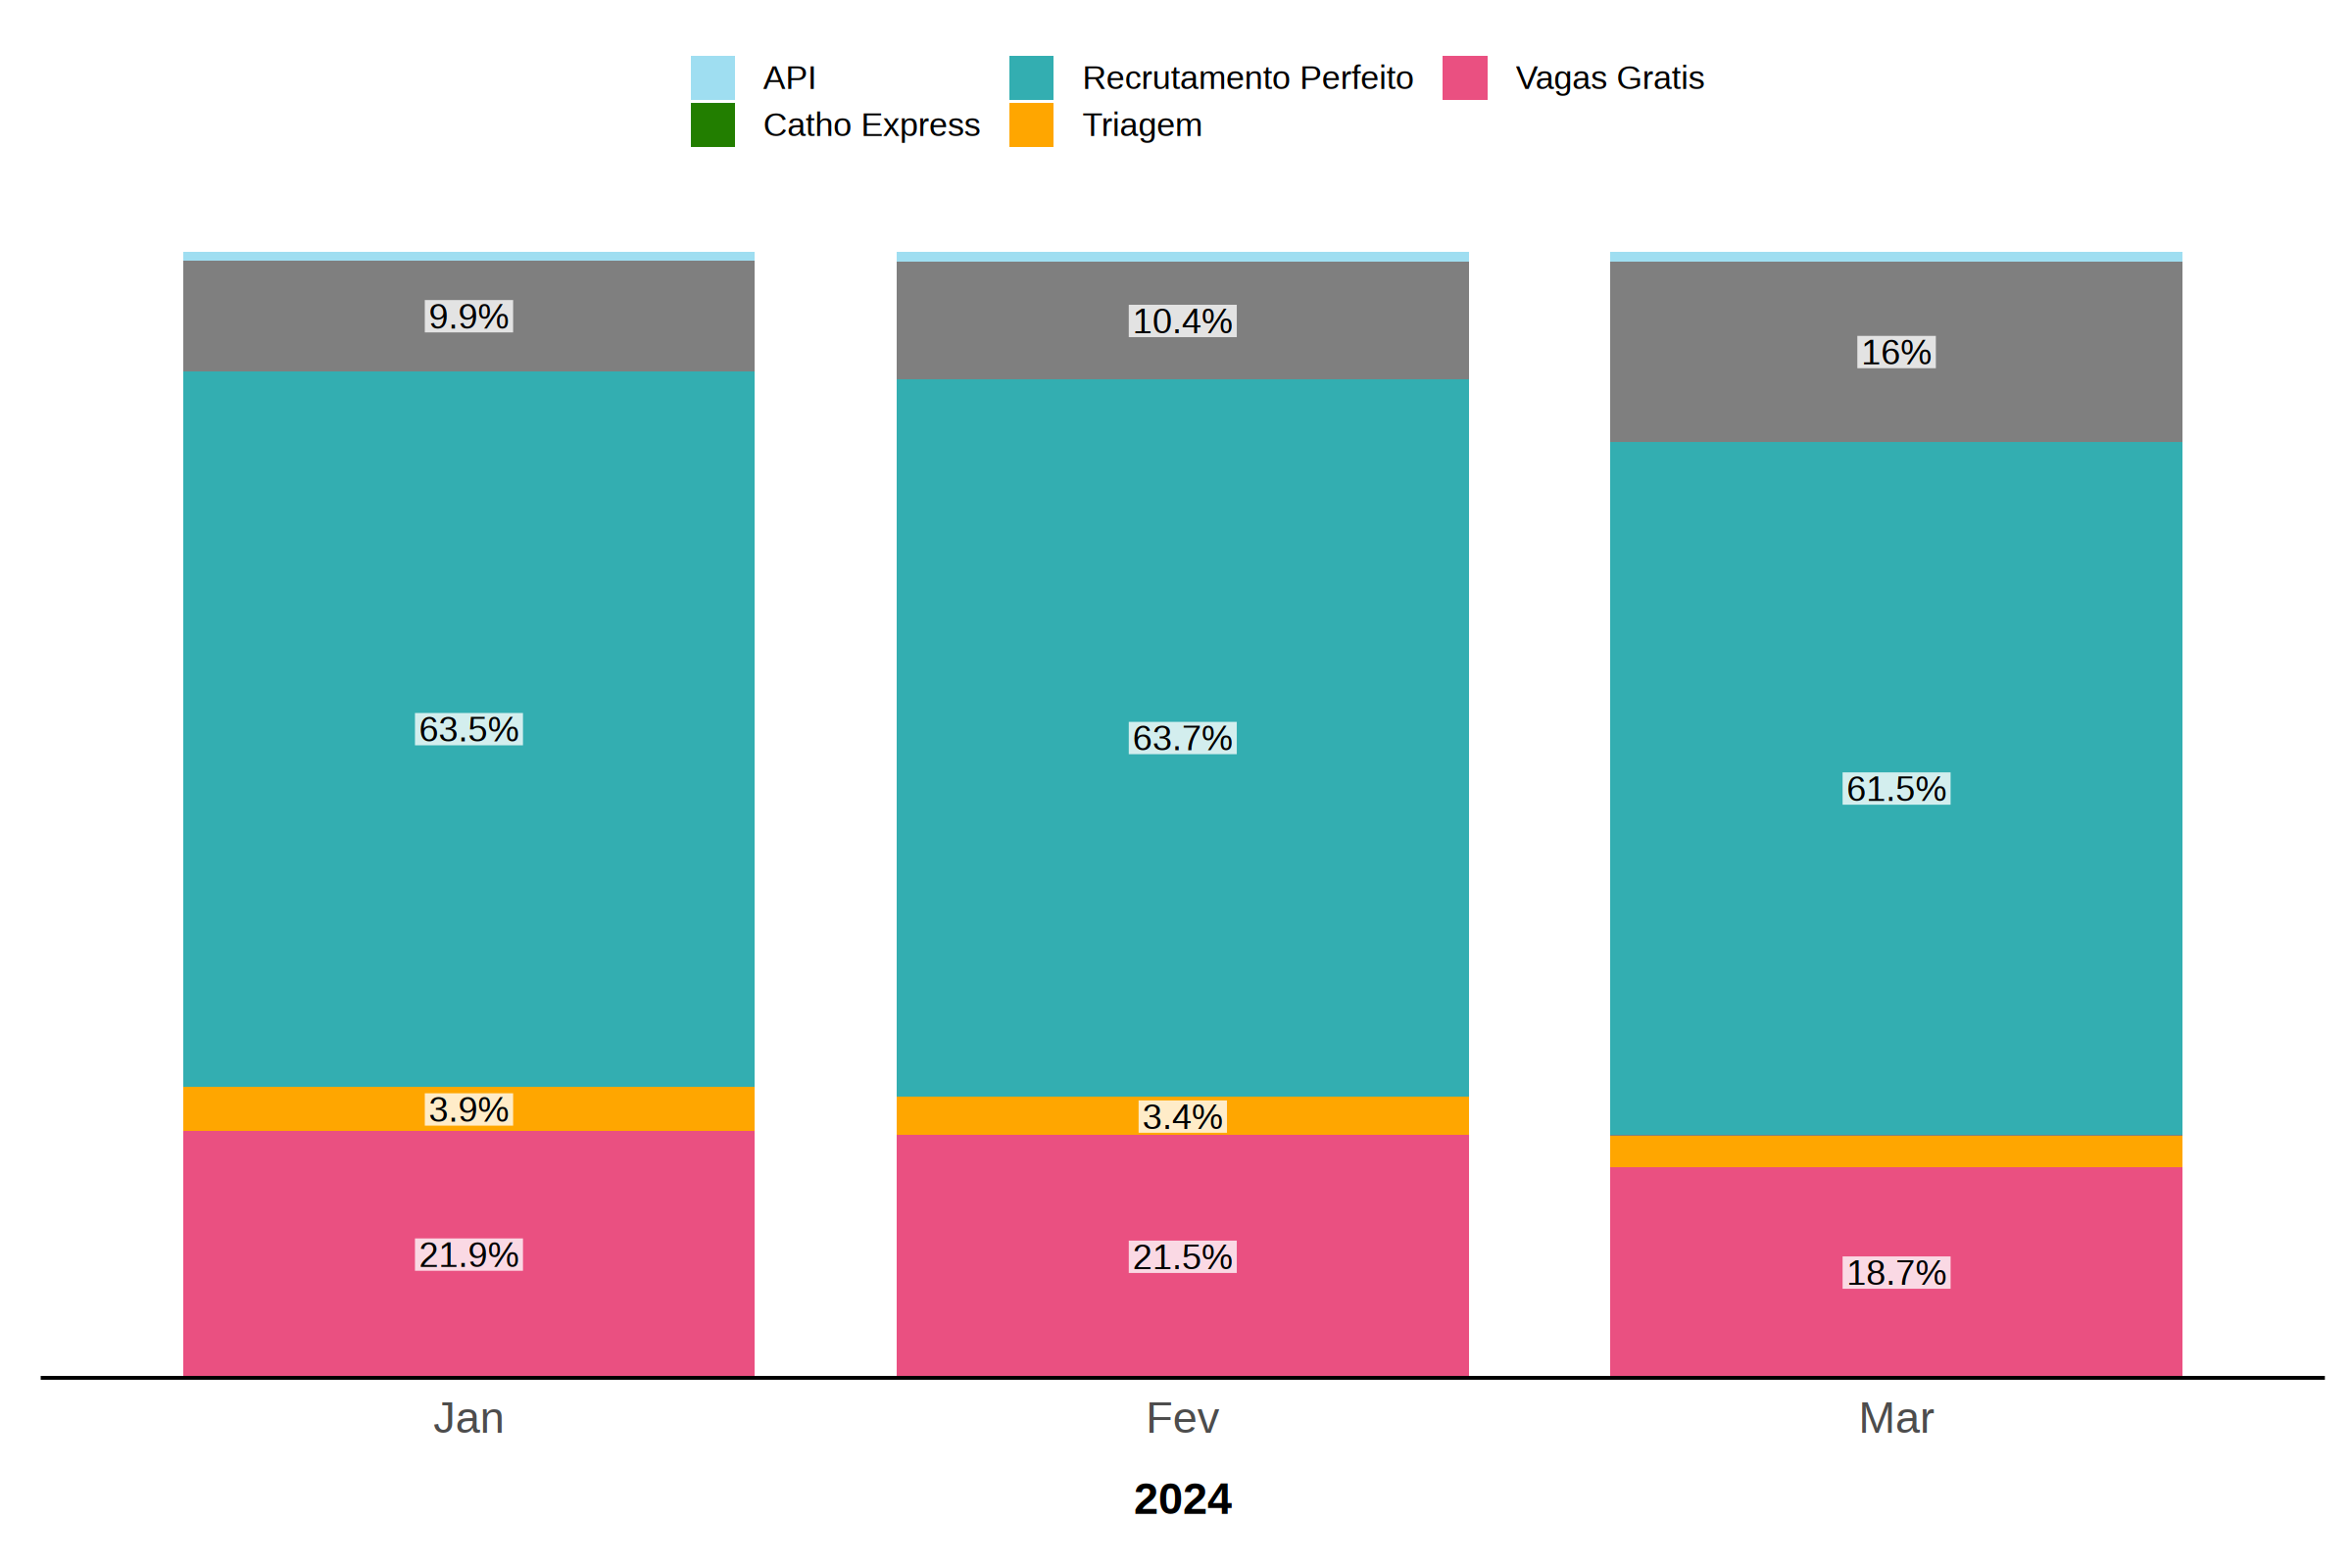

In [28]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
hbu_contatos |>
    generate_stats(stats_var = "contacts",category_var = "origem",groups = c("year", "month")) |>
    plot_monthly_share()

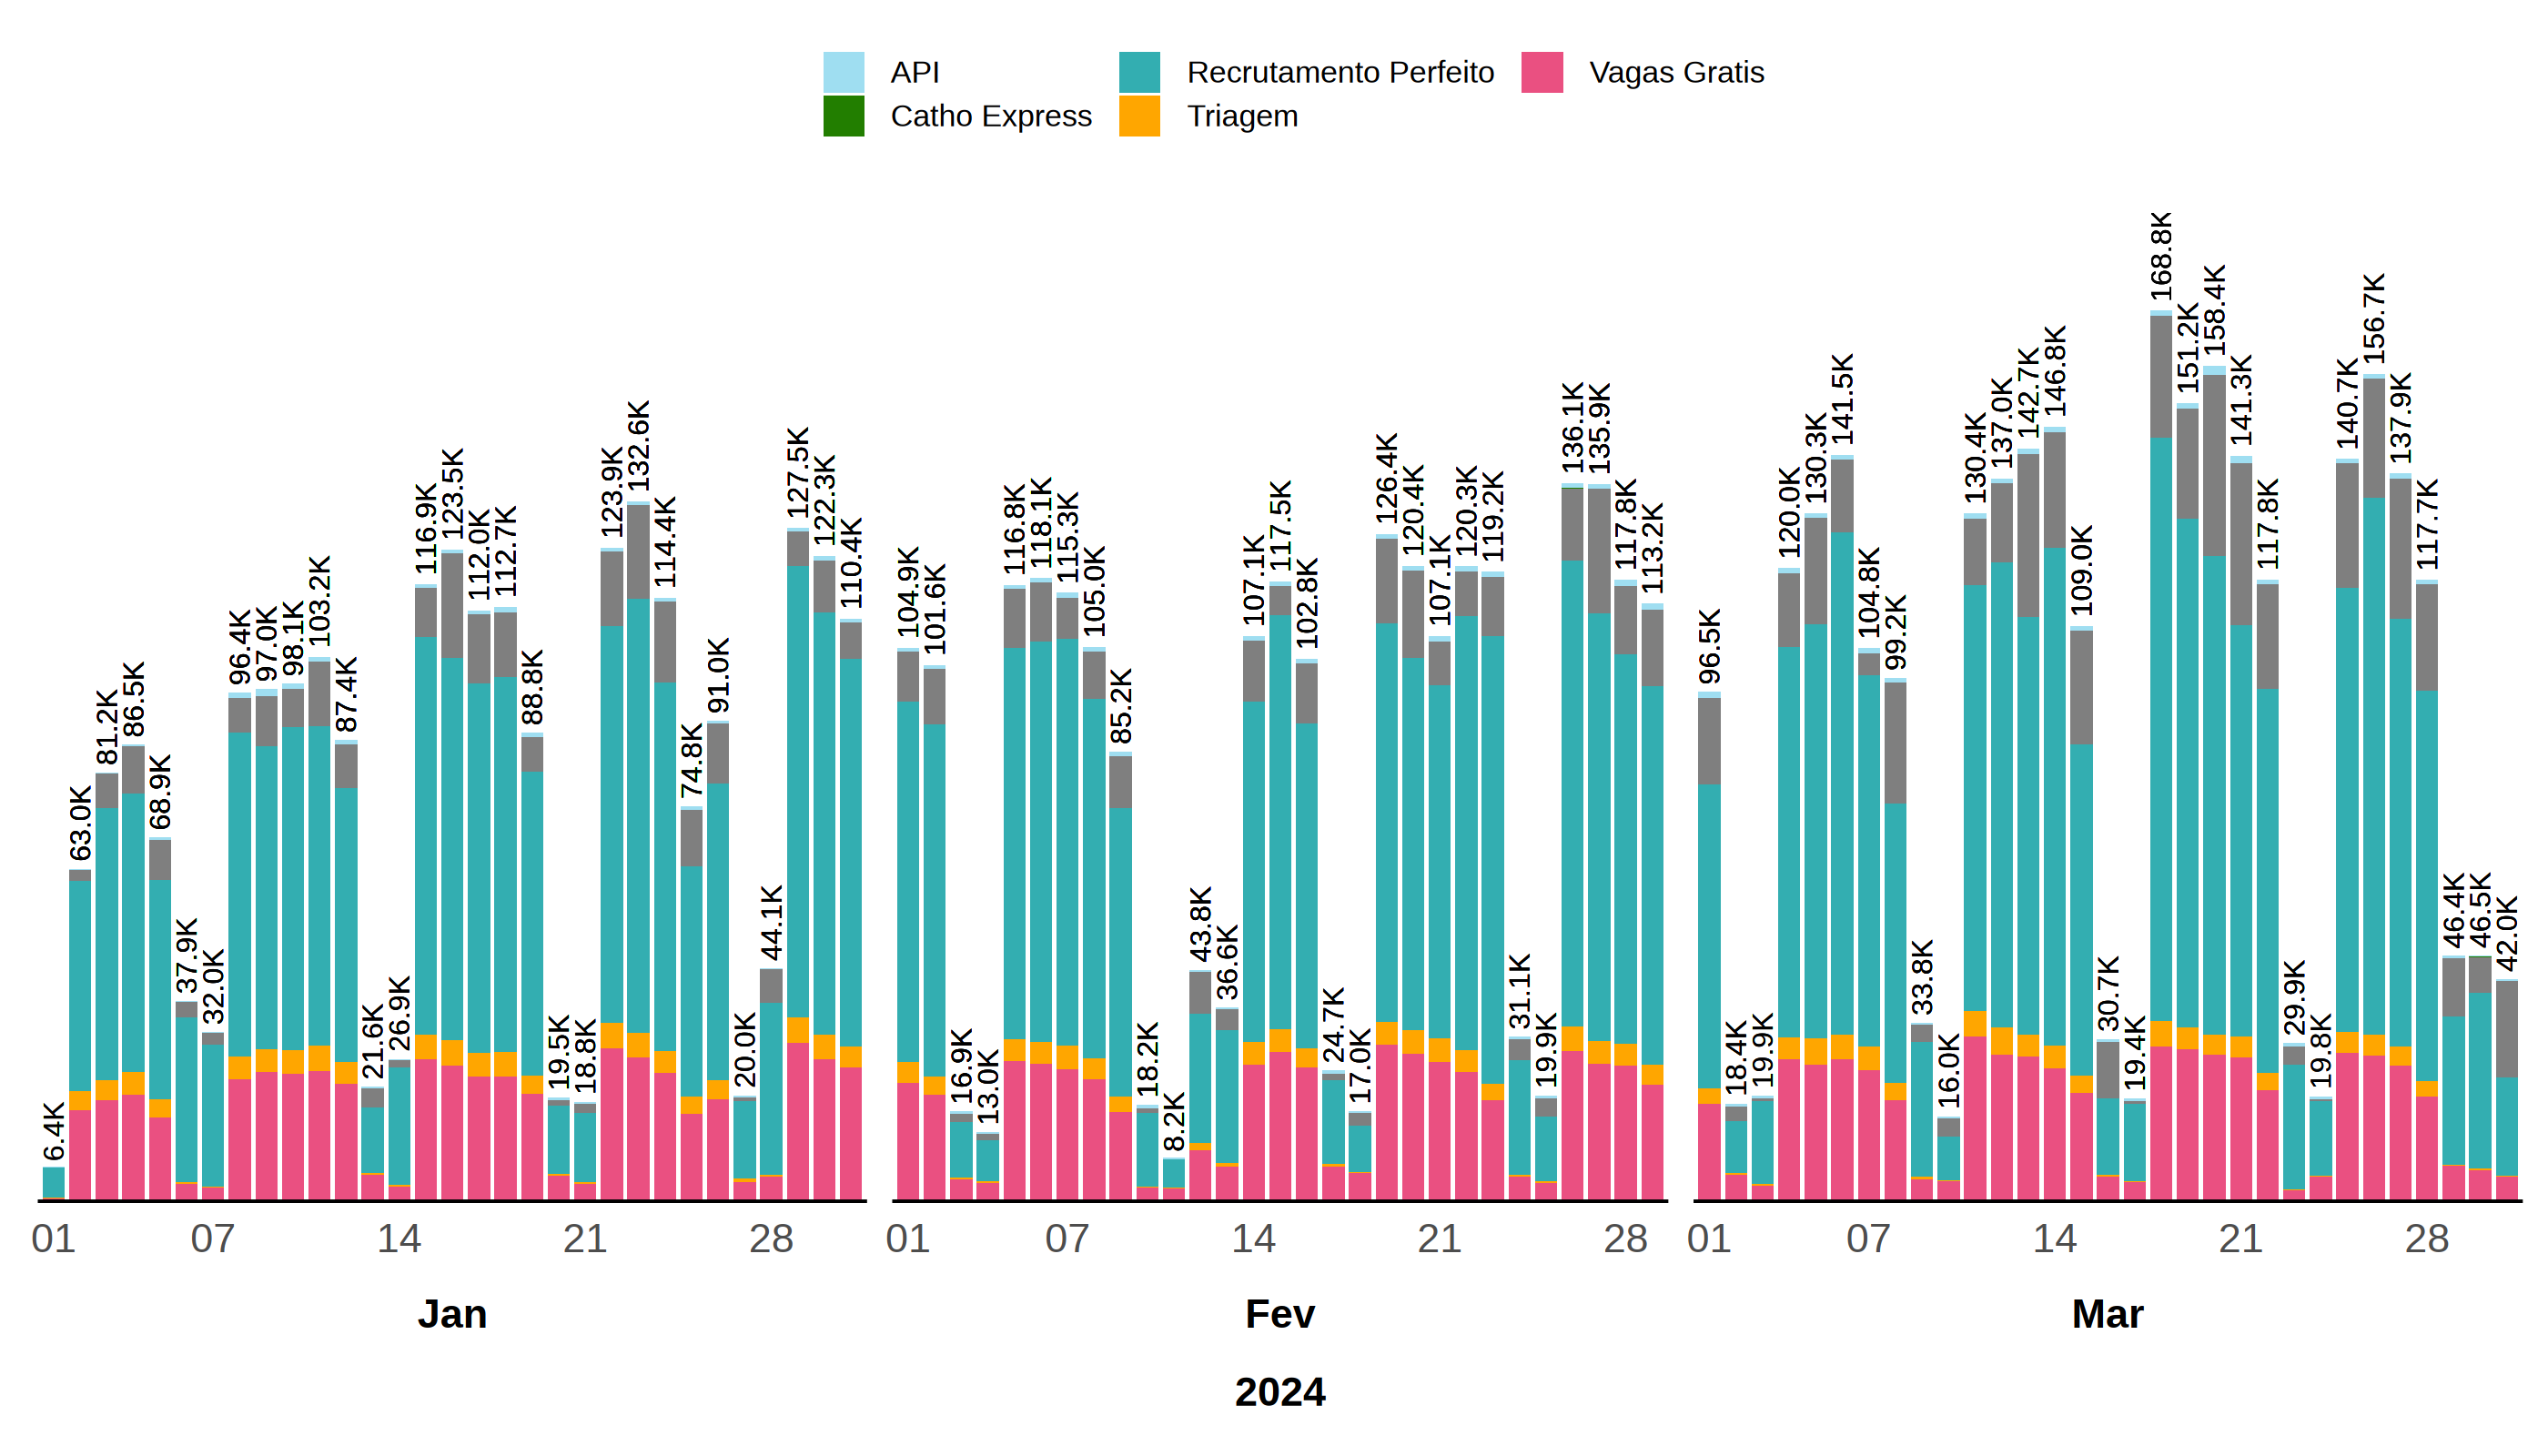

In [31]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
hbu_contatos |>
    generate_stats(stats_var = "contacts",category_var = "origem",groups = c("year", "month","day")) |>
    plot_daily_volume()

## <span style="color:purple">**Contacts with Apply Verification**</span>

In [32]:
cbu_contatos_applies <- summarise_data(
  target_dates = all_target_dates,
  type = "contacts-applies",
  type_level = "merged",stat_id = "usr_id",
  groups = c("report_channel","subscription","year","month","day"))


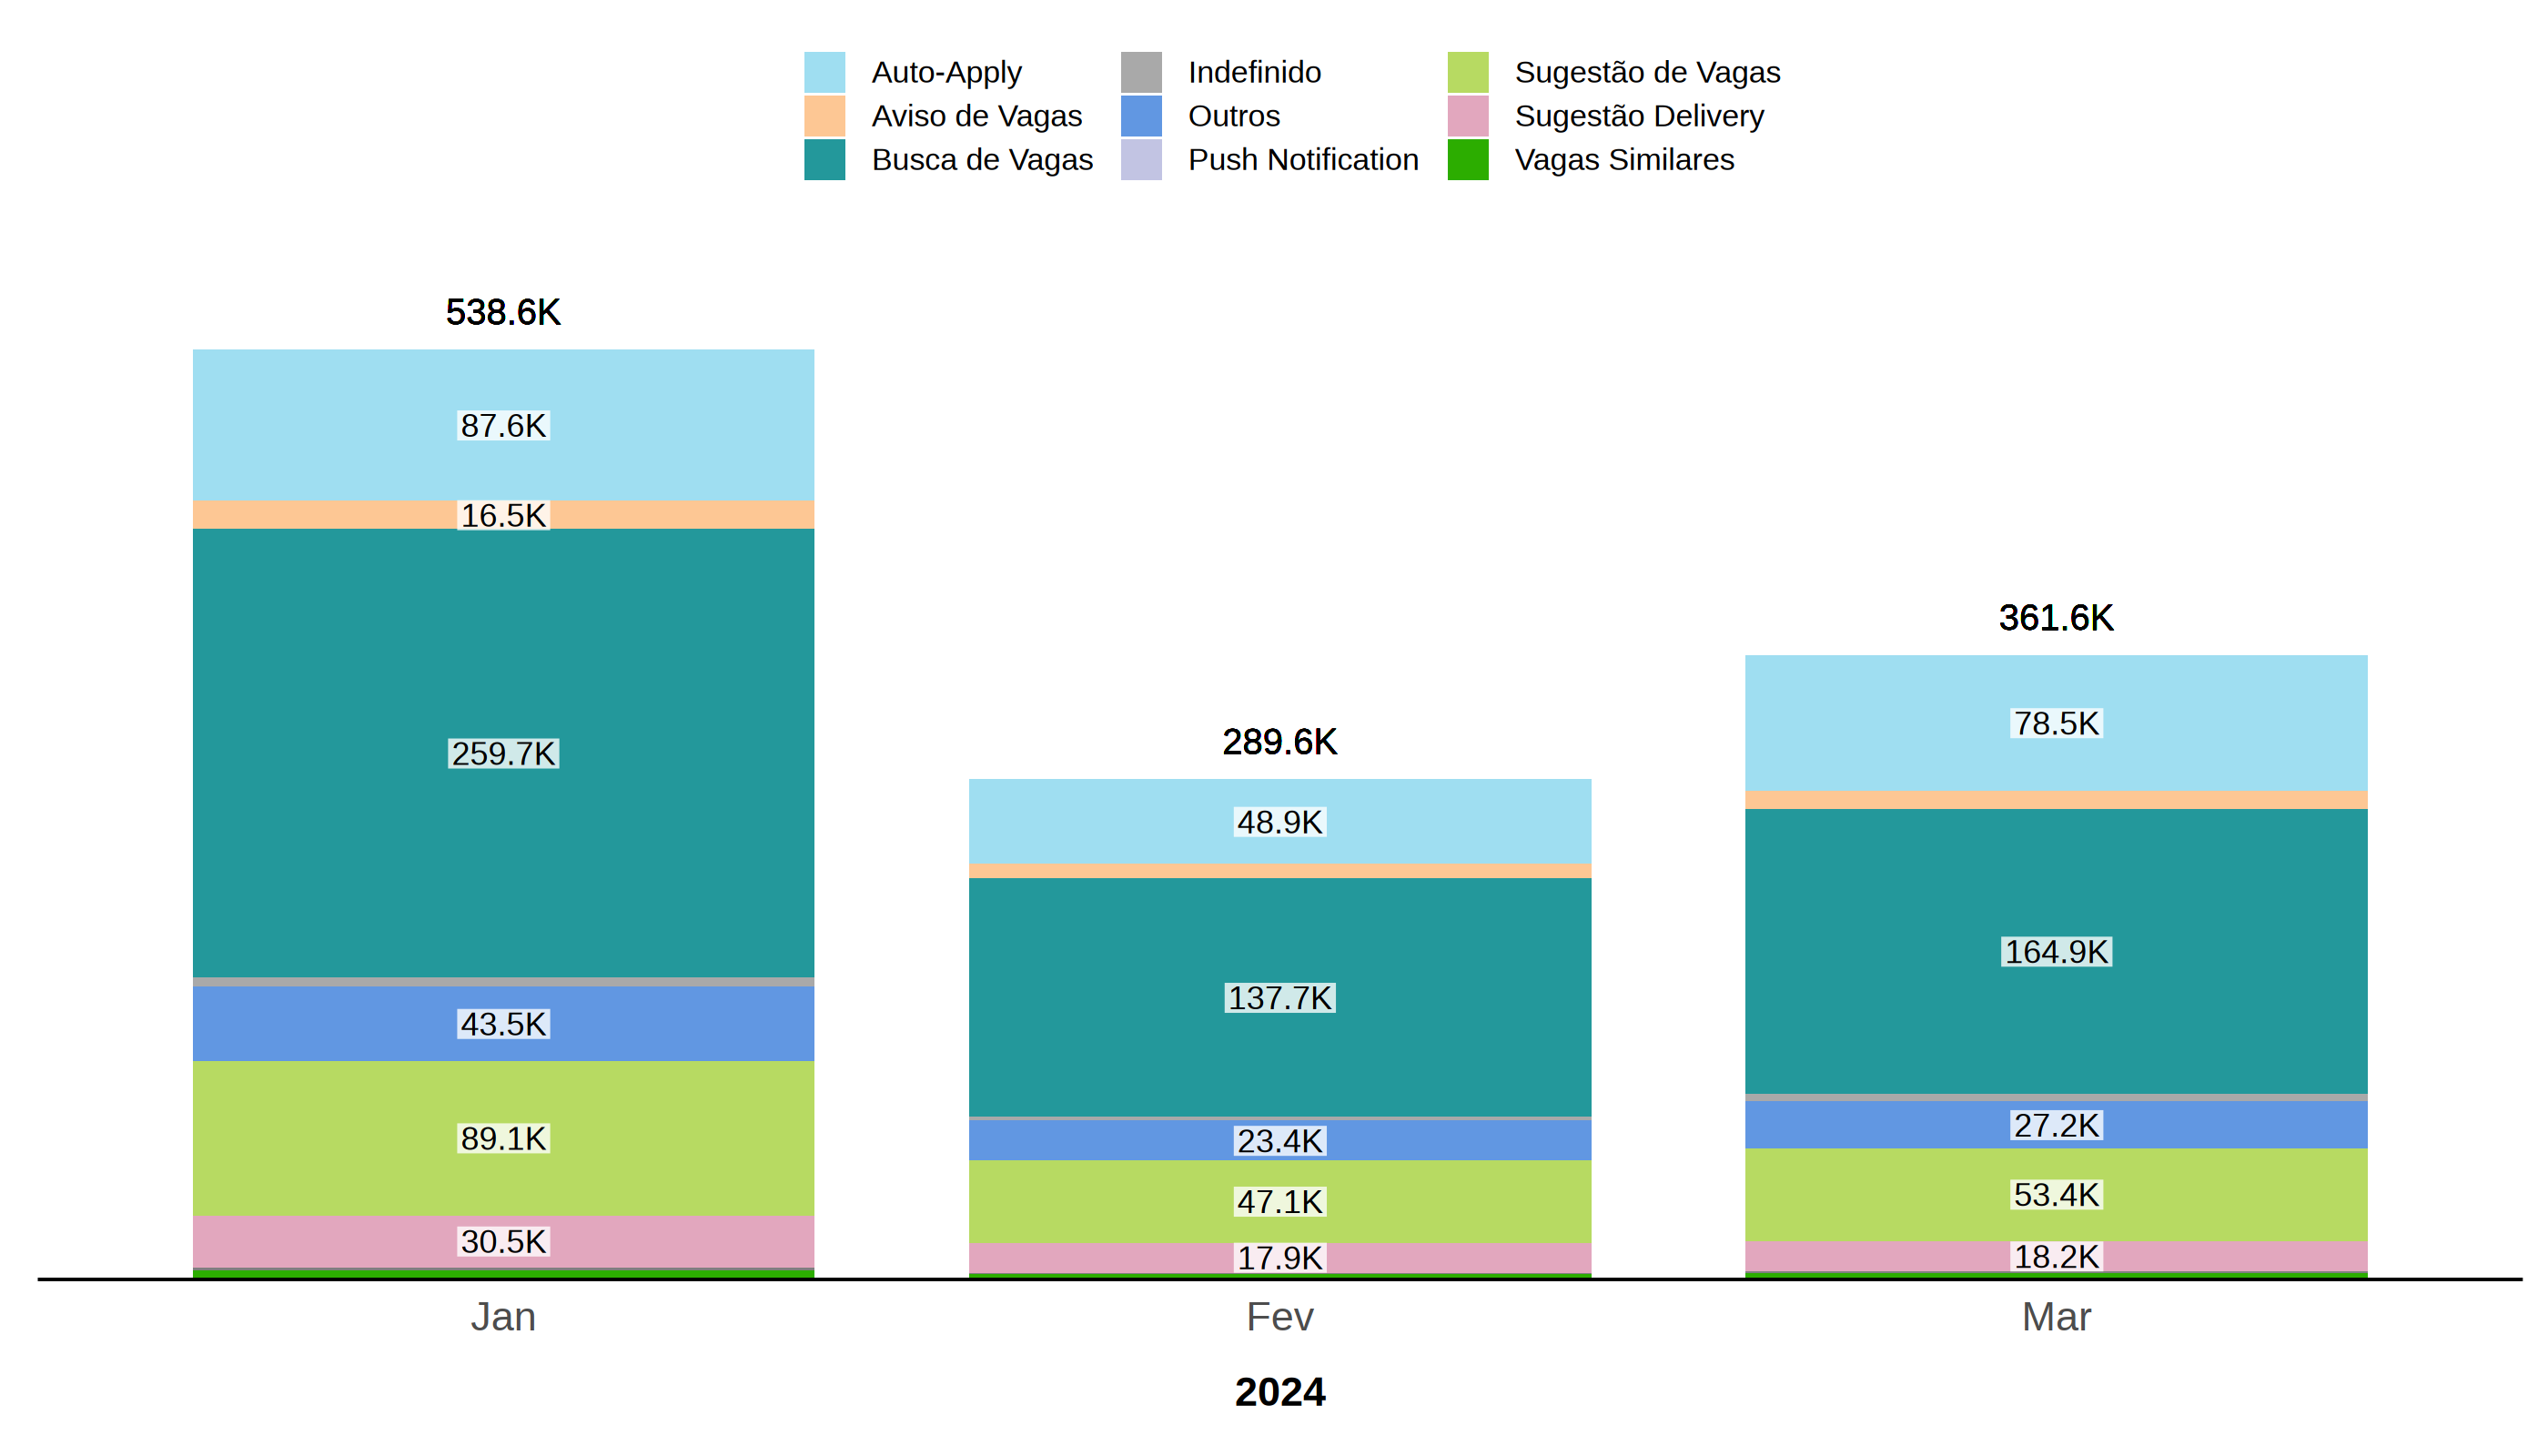

In [34]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_contatos_applies |>
    generate_stats(stats_var = "contacts",category_var = "report_channel",groups = c("year", "month")) |>
    plot_monthly_volume()

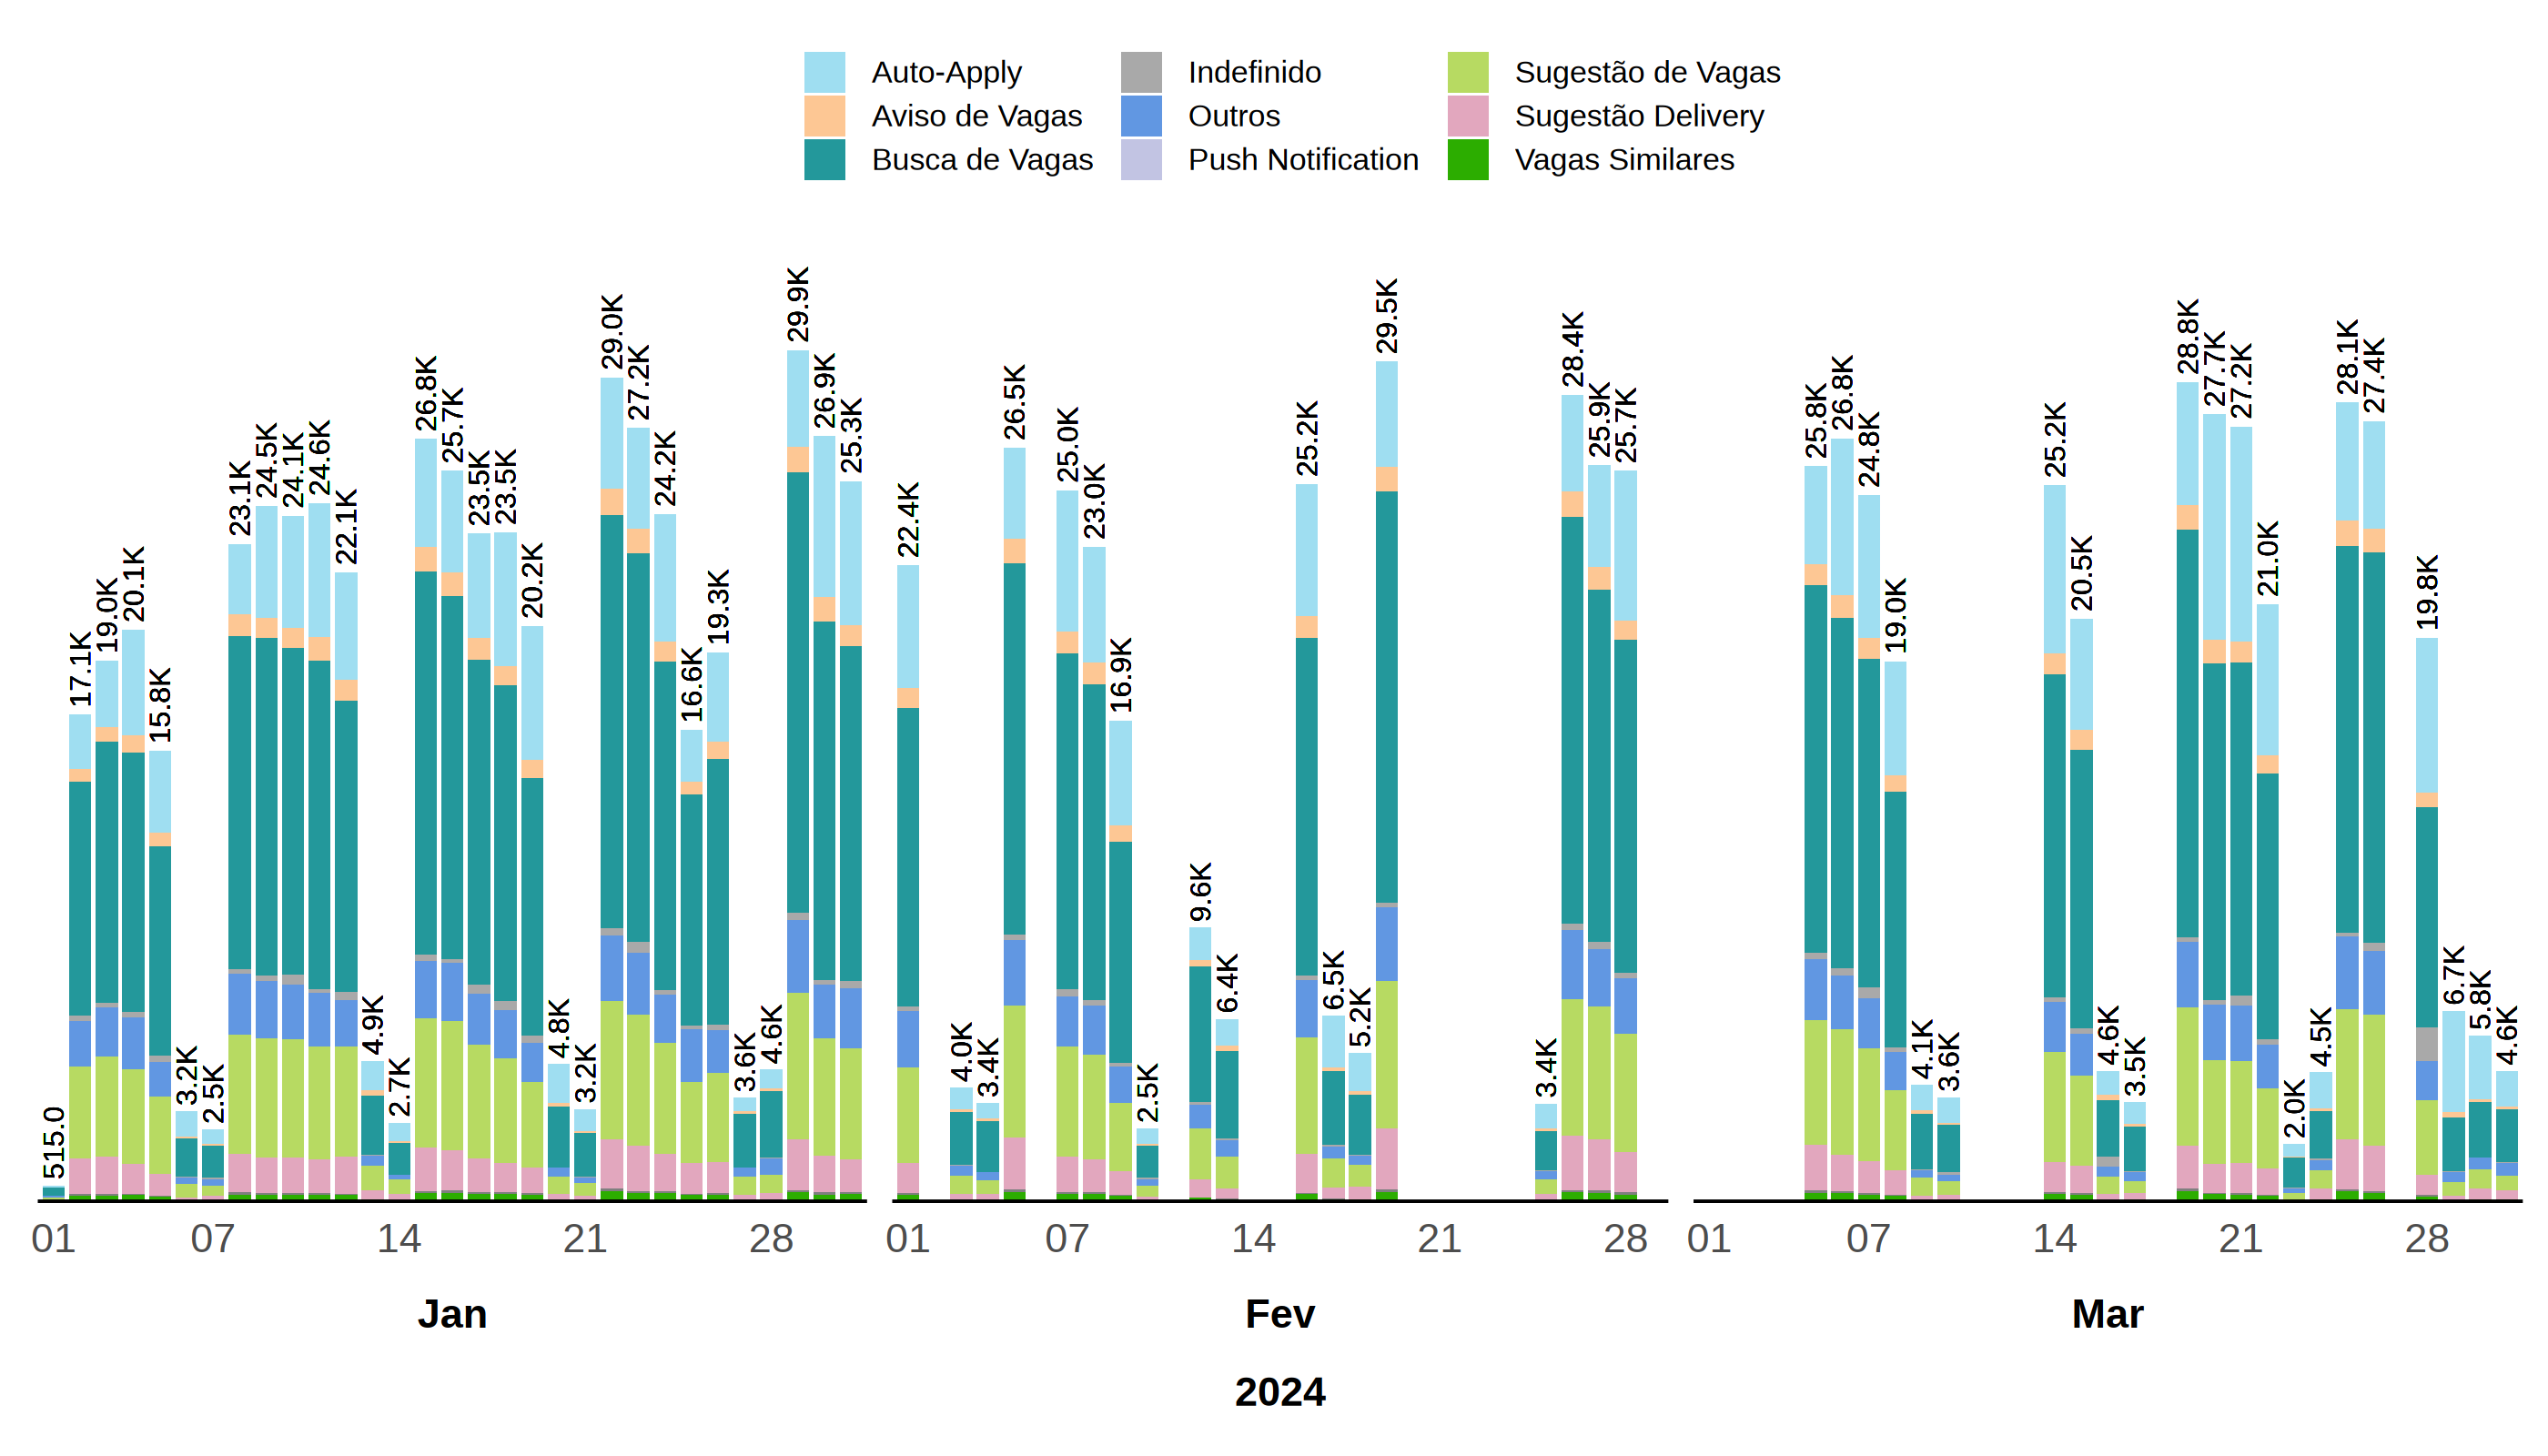

In [36]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 200)
cbu_contatos_applies |>
    generate_stats(stats_var = "contacts",category_var = "report_channel",groups = c("year", "month","day")) |>
    plot_daily_volume()